In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as MoMetrics
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots

In [3]:
orbitfile = 'ssm_2k/neos_2k.des'
obsfile = 'enigma_1189_neos_2k/neos_2k_allObs.txt'
runName = 'enigma_1189'
metadata = 'NEOs_2k'
outDir = 'neo_disc'

In [4]:
mos = MoSlicer(orbitfile, Hrange=np.arange(15, 26, 0.5))
mos.readObs(obsfile)
#mos.allObs.tail(10)

In [4]:
metric = MoMetrics.FirstDiscoveryConditionsMetric()
slicer = mos
pandasConstraint = None
plotDict = {'nxbins':100, 'nybins':100}
bundle = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                            runName=runName, metadata=metadata, plotDict=plotDict)

In [5]:
bdict = {'b':bundle}
bg = mmb.MoMetricBundleGroup(bdict, outDir=outDir)
bg.runAll()

Calculated all metrics.


In [6]:
hidx = np.where(mos.Hrange == 22)[0]
mval = np.swapaxes(bundle.metricValues, 0, 1)[hidx]
discoveries = mval[0].compressed()
print np.shape(discoveries)

(1893,)


In [7]:
times = []
ra = []
dec = []
for i in discoveries:
    if i[0] > 0:
        times.append(i[0])
        ra.append(i[1])
        dec.append(i[2])
times = np.array(times)
ra = np.array(ra)
dec = np.array(dec)

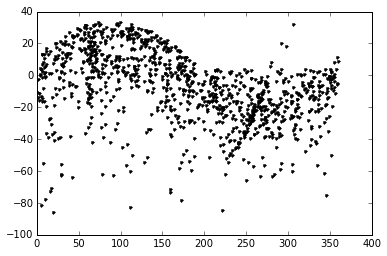

In [8]:
plt.plot(ra, dec, 'k.')

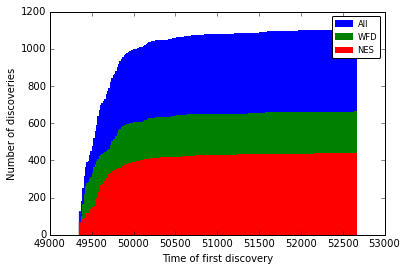

In [9]:
n, b, p = plt.hist(times, bins=200, cumulative=True, edgecolor='b', facecolor='b', label='All')
condition = (dec < 0)
n, b, p = plt.hist(times[condition], bins=b, cumulative=True, edgecolor='g', facecolor='g', label='WFD')
condition = (dec > 0)
n, b, p = plt.hist(times[condition], bins=b, cumulative=True, edgecolor='r', facecolor='r', label='NES')
plt.legend(fancybox=True, numpoints=1, fontsize='smaller')
plt.xlabel('Time of first discovery')
plt.ylabel('Number of discoveries')